# Modelo 1 machine learning classificação - Fraude de cartão de crédito


# Definição do Problema de Negócio:  Fraude de cartão de crédito
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Definição do Problema


É importante que as operadoras de cartão de crédito possamreconhecertransações fraudulentas no momento exato.
Em que elas estiveremocorrendo, para que os clientes não sejam cobrados pelos itens que não compraram. 
Nosso objetivo neste trabalho de análise é identificar umproblemacomumquando trabalhamos com dados que apresentam anomalias (fraudes, nessecaso). 
Em cenários assim, temos uma situação comum que precisa ser tratada:
Conforme você já sabe, usamos dados históricos para treinar modelosdeMachine Learning. 
Esperamos que a operadora de cartão de crédito tenhamuitomais exemplos históricos de transações corretas do que transações fraudulentas.
Se essa premissa não fosse verdadeira, a empresa já teria ido àfalência, concorda?. 
Mas se entregarmos os dados dessa forma ao modelo de MachineLearning, ele vai aprender mais sobre uma categoria de transações o que outra. 
Imaginepor exemplo que a empresa tenha essa massa de dados de umdia de transaçõesde cartão de crédito.

# Dados da empresa 

25.000 exemplos de transações corretas (classe majoritária) 314 exemplos de transações fraudulentas (classe minoritária).
Esse é tipicamente um problema de classificação, emque o modelo de Machine Learning deve analisar cada transação e classificar como fraudulenta ou não fraudulenta. 
Cada modelo de Machine Learning procura pelo relacionamento matemático nos dados. 
Mas nosso dataset está desbalanceado e, nessecaso, omodelo vai aprender muito mais sobre uma transação normal do que sobre uma transação fraudulenta. 
Como resultado, o modelo pode classificar novastransações fraudulentas como se fossem transações normais, simplesmente porque aprendeu mais sobre uma classe do que sobre a outra. 
Para minimizar esse problema, podemos aplicar uma de muitas técnicas de balanceamento de classes, criando dados sintéticos para aumentar transações fraudulentas (isso é chamado de oversampling) 
Ou então podemos remover alguns registros da classe de transações normais (isso é chamadodeundersampling). 
O undersampling é mais fácil, mas reduz o tamanho do dataset, oquenãoéo ideal. 
O oversampling pode ser mais trabalhoso e mais complicado deexplicar, porém aumenta o tamanho do dataset criando dados sintéticos combaseemregras estatísticas e de forma aleatória, usando observações da classe minoritáriacomo ponto de partida. 
Neste estudo dirigido usaremos uma técnica de balanceamento de classes chamada Randomly OverSampling Examples (ROSE) e comum pacote R perfeito para essa tarefa, chamado.....ROSE. 
Dada a taxa de desequilíbrio de classe, o ideal é medir a precisãousandoamétrica Área Sob a curva Precision-Recall (AUPRC). 
Usar apenas aacuráciadefinida pela matriz de confusão não é significativo para a classificaçãocomclasses desbalanceadas e também veremos isso.
Contexto: Balanceamento de Classesem Dados de Fraudes Financeiras com ROSE(Random Over Sampling Examples)


# Base dados 

Usaremos o dataset público disponibilizado pelo Machine Learning Group. 
O dataset deve ser baixado do link abaixo o dataset não será fornecidocomoscript, pois o arquivo é grande.

# Discrição do dataset
O conjunto de dados contém transações realizadas comcartões decréditoem setembro de 2013 por portadores de cartões europeus. 
Esse conjunto de dados apresenta transações que ocorreramemdoisdias, nas quais temos 492 fraudes em 284.807 transações. O conjunto dedadoséaltamente desequilibrado, a classe positiva (fraudes) representa 0,172 de todas transações. 
Ele contém apenas variáveis de entrada numéricas que sãooresultadode uma transformação PCA. 
Devido a problemas de confidencialidade, nãosepode fornecer os recursos originais e mais informações básicas sobreos dados. 
Recursos V1, V2,… V28 são os principais componentes obtidos como PCA, osúnicos recursos que não foram transformados com o 

# PCA 
**Tempo** 

**Valor** 

**Orecurso**

**Hora**

- Contém os segundos decorridos entre cada transação e aprimeiratransação no conjunto de dados. 
- O recurso 'Valor' é o valor da transação. Orecurso 'Classe' é a variável de resposta e assume o valor 1 emcaso de fraudee0em caso contrário.


# Projeto

- Esse é um projeto prático da DSA na formação cientista de dados no primeiro módulo do curso Big Data Analytics com R e Microsoft Azure Machine Learning.


**Objetivo: É encontrar possíveis cartões fraudes**


#**Modelo ML**

- Decision tree
- Naive bayes

# **Modelos hiperparâmetros**
- Randomized SearchCV

- GridSearchCV	


# Importação das bibliotecas

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

numpy     : 1.20.3
watermark : 2.3.0
seaborn   : 0.11.2
pandas    : 1.3.4
plotly    : 5.6.0
matplotlib: 3.4.3



In [4]:
# Configuração para os gráficos largura e layout dos graficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

# Base dados

In [6]:
# Carregando a base de dados

df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# Exibido 5 primeiros dados
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Exibido 5 últimos dados 
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# Número de linhas e colunas
df.shape

(284807, 31)

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Exibido tipos de dados
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 284807
Números de colunas: 31


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [14]:
# Dados faltantes coluna óbitos

data = df[df["Class"].notnull()]
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# Dados faltantes colunas internacoes

data = df[df["Class"].notnull()]
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Removendo dados ausentes do dataset 

df = df.dropna()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

df.notnull().sum()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [19]:
# Total de número duplicados

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [20]:
# Renomeando estados por região 

df["Class"].unique()

array([0, 1], dtype=int64)

# Estatística descritiva

In [21]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [22]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


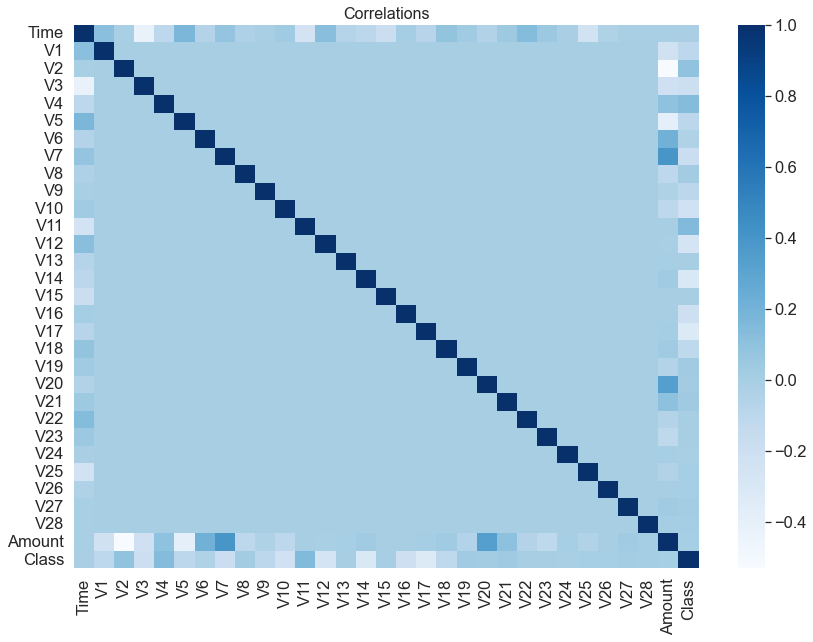

In [23]:
# Gráfico da matrz de correlação 

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations", size=16)
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

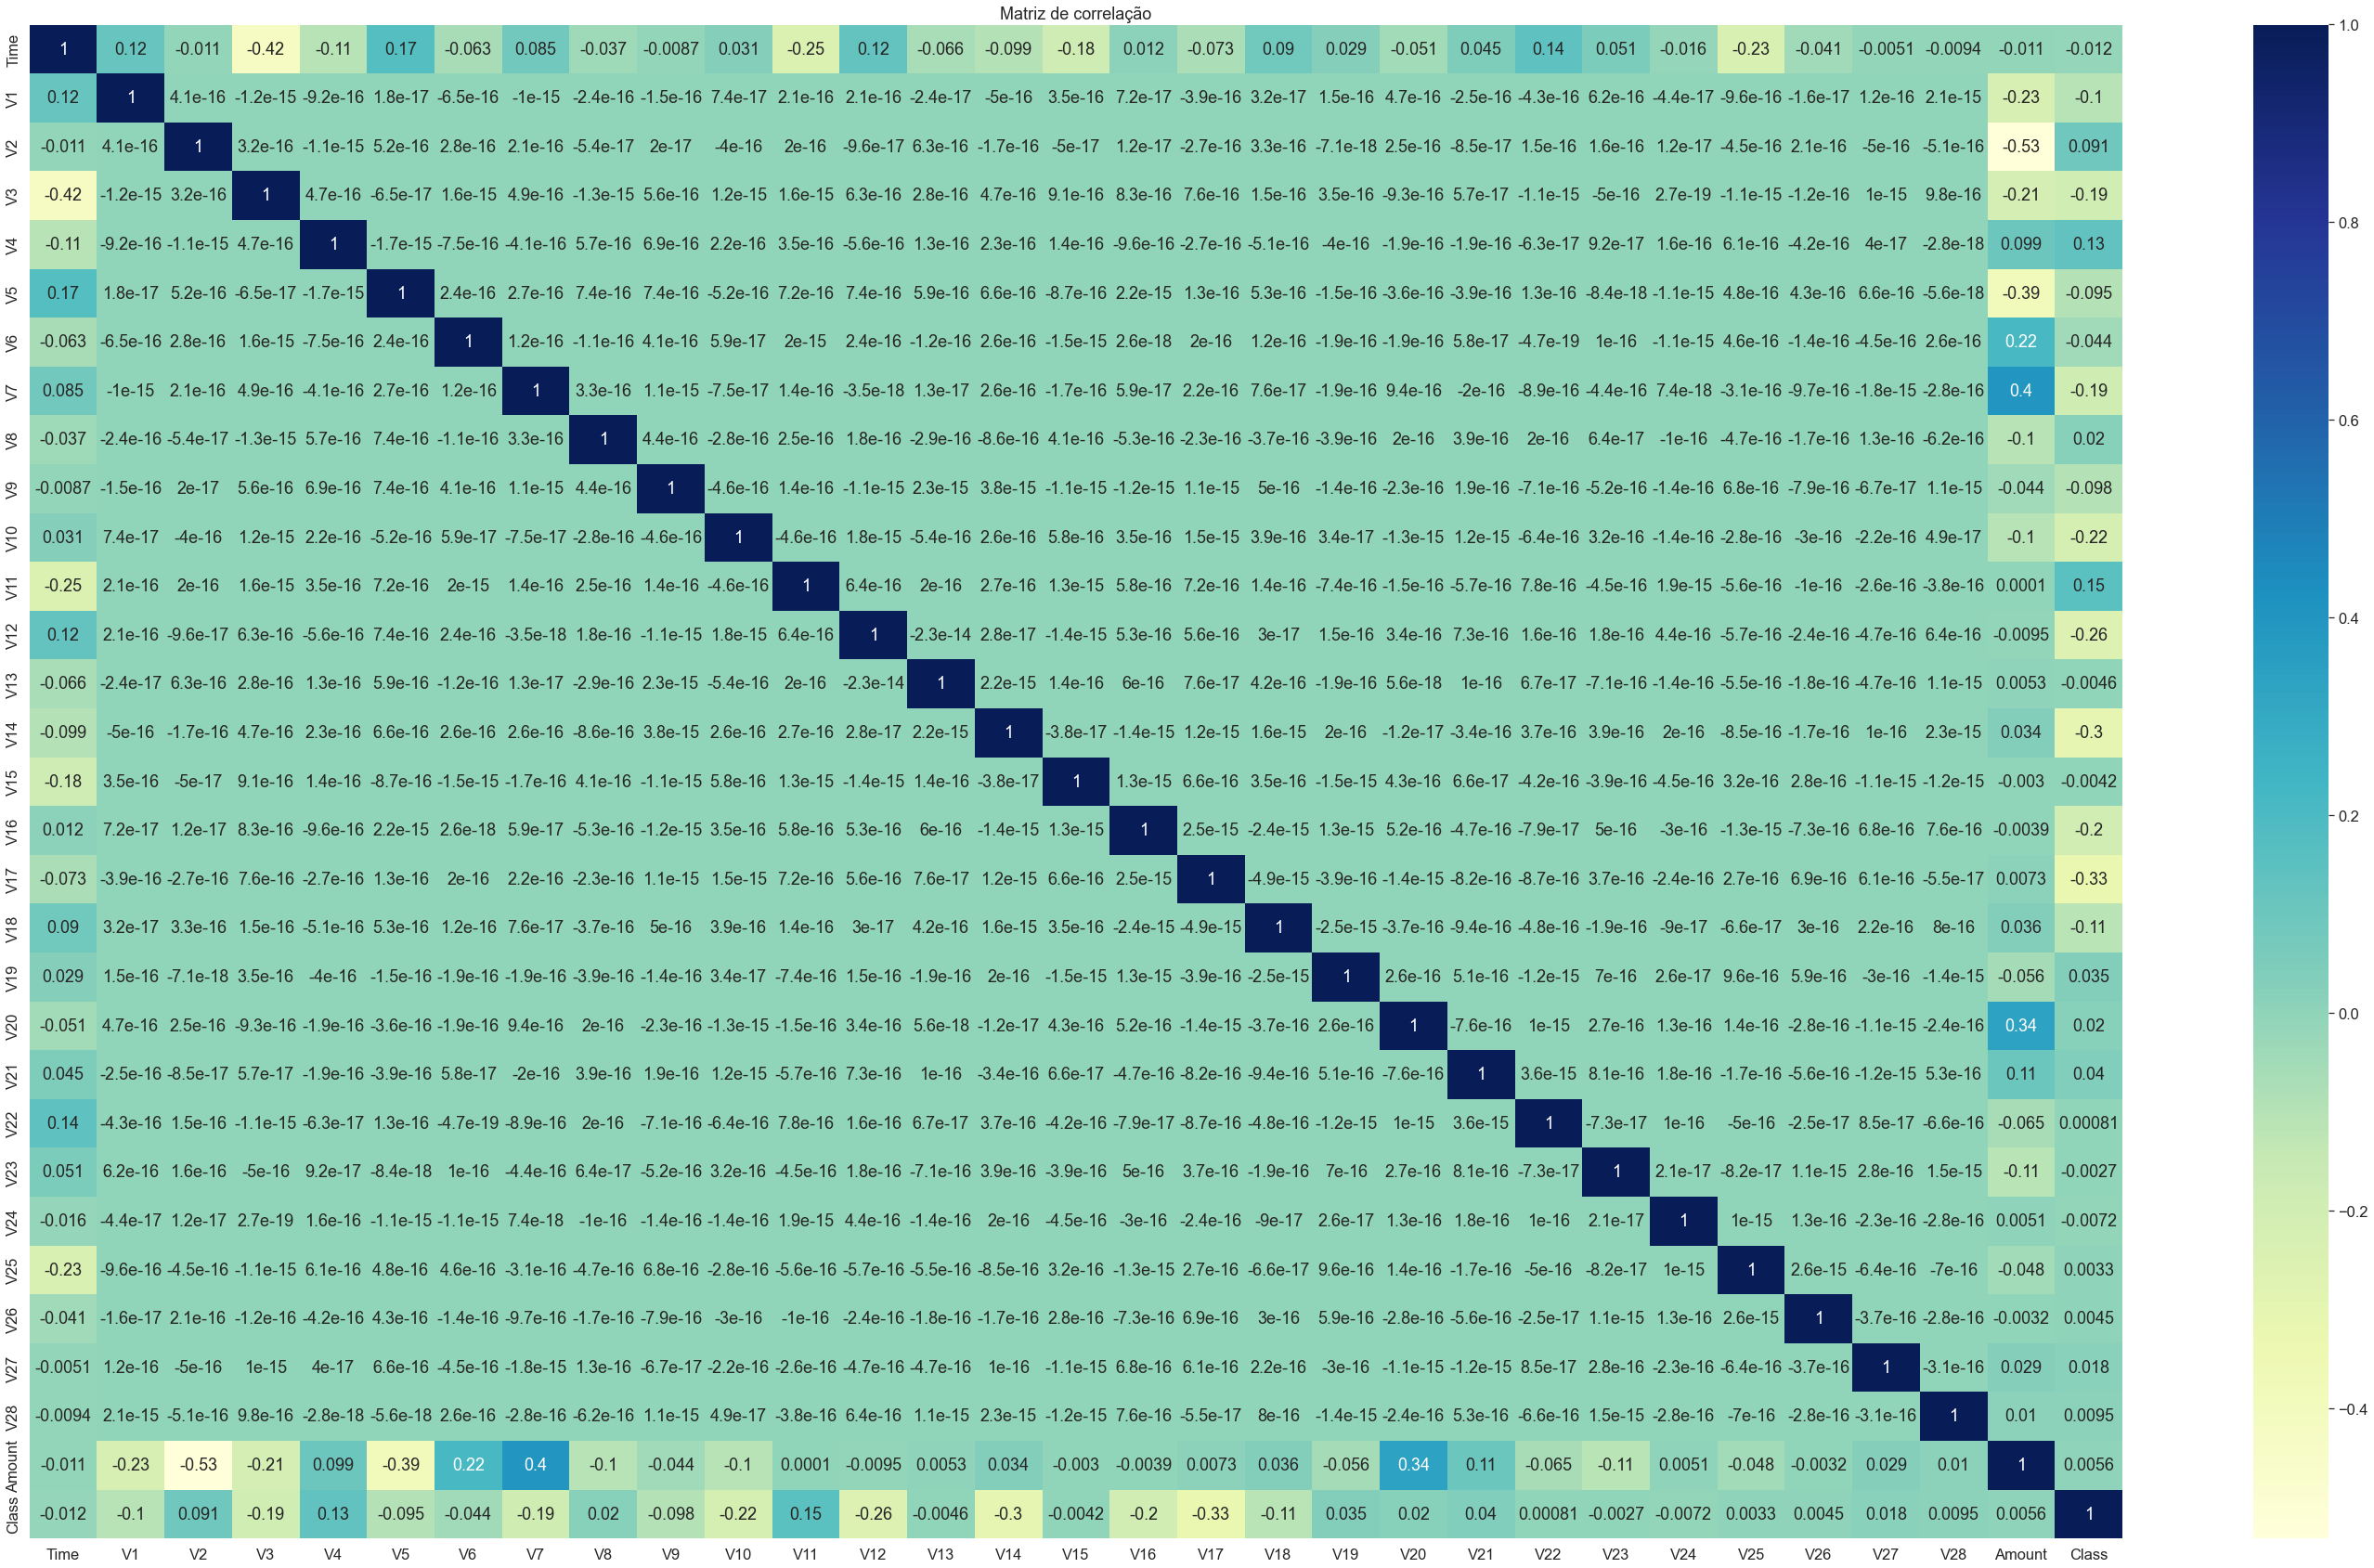

In [24]:
# Gráfico da matriz de correlação

plt.figure(figsize=(50.5,30))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

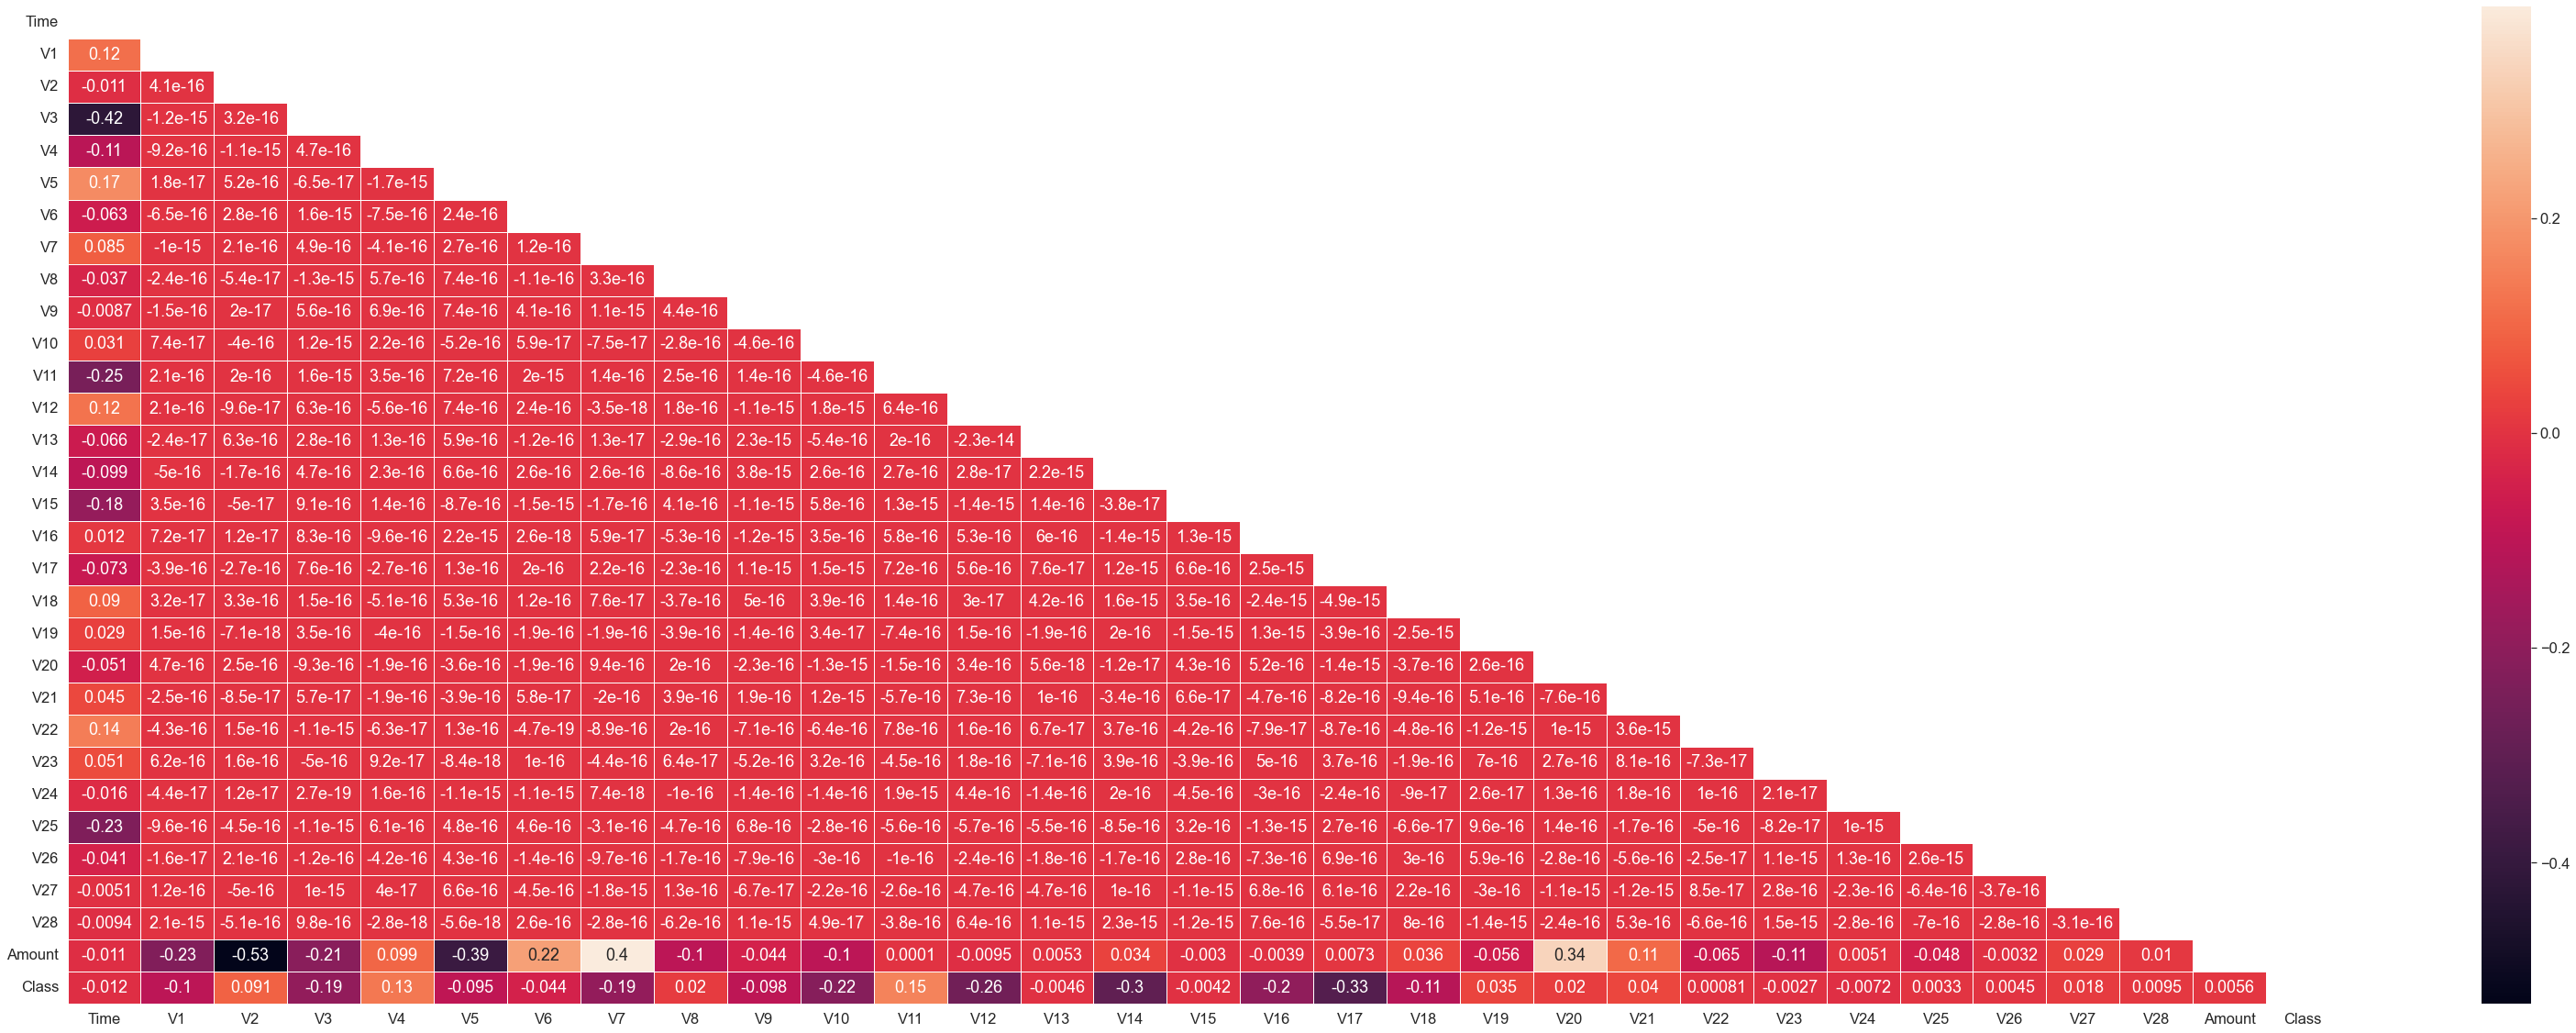

In [25]:
plt.figure(figsize=(55.5,20))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

# Análise de dados

Text(0, 0.5, 'Total')

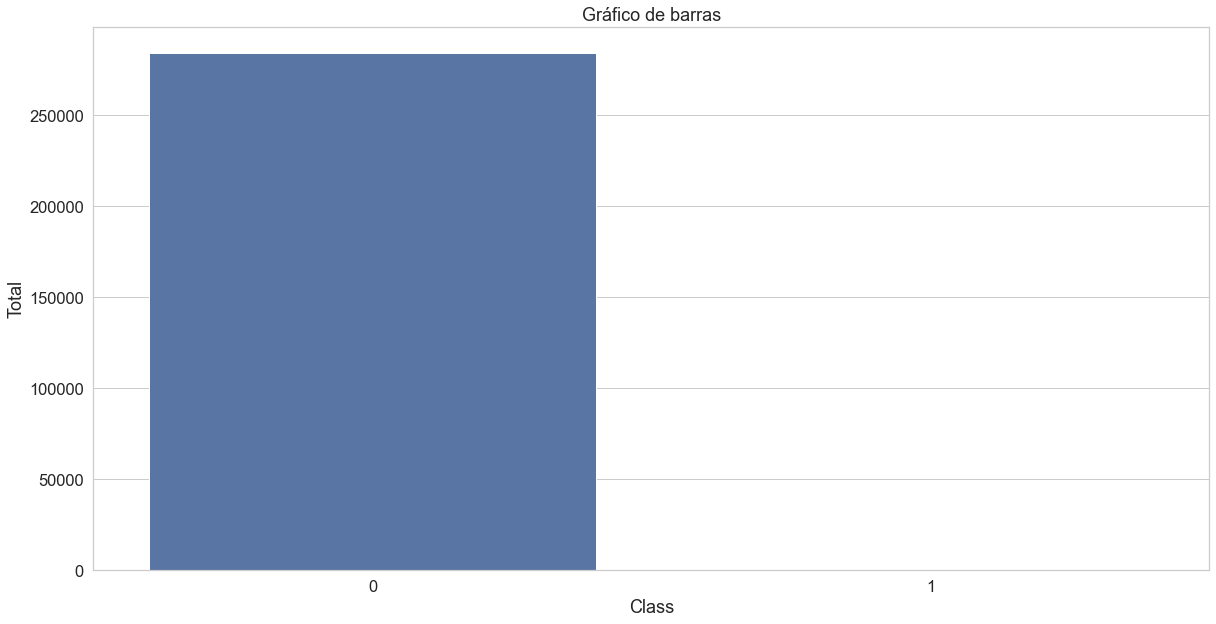

In [26]:
plt.figure(figsize=(20,10))
plt.title("Gráfico de barras")
sns.countplot(df["Class"])
plt.ylabel("Total")

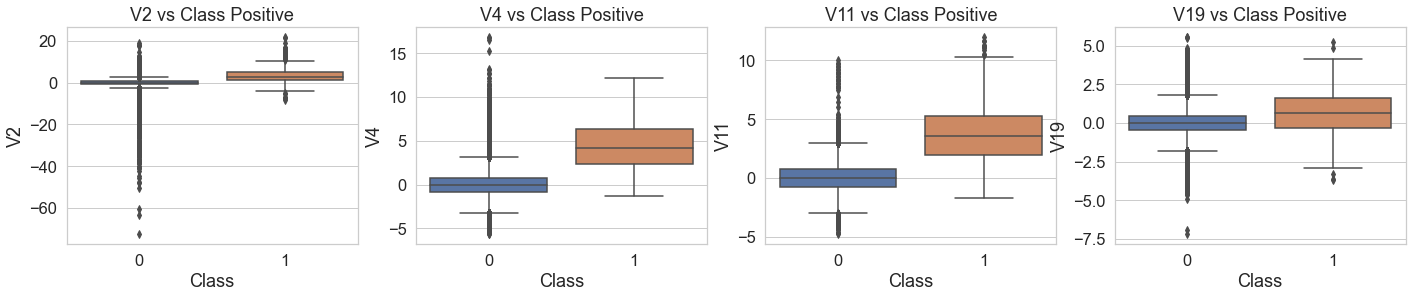

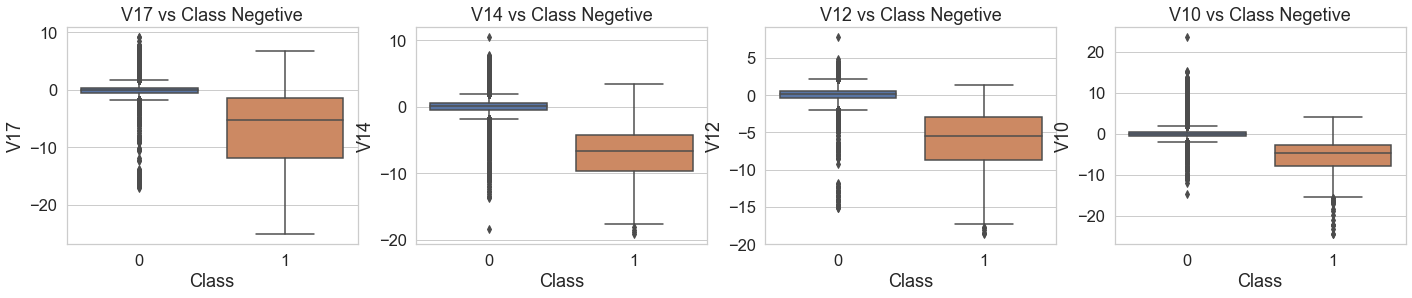

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(24,4))

sns.boxplot(data=df, x="Class", y="V2", ax=axes[0])
axes[0].set_title("V2 vs Class Positive")

sns.boxplot(data=df, x="Class", y="V4", ax=axes[1])
axes[1].set_title("V4 vs Class Positive")

sns.boxplot(data=df, x="Class", y="V11", ax=axes[2])
axes[2].set_title("V11 vs Class Positive")

sns.boxplot(data=df, x="Class", y="V19", ax=axes[3])
axes[3].set_title("V19 vs Class Positive");

f, axes = plt.subplots(ncols=4, figsize=(24,4))

sns.boxplot(data=df, x="Class", y="V17", ax=axes[0])
axes[0].set_title("V17 vs Class Negetive")

sns.boxplot(data=df, x="Class", y="V14", ax=axes[1])
axes[1].set_title("V14 vs Class Negetive")

sns.boxplot(data=df, x="Class", y="V12", ax=axes[2])
axes[2].set_title("V12 vs Class Negetive")

sns.boxplot(data=df, x="Class", y="V10", ax=axes[3])
axes[3].set_title("V10 vs Class Negetive");

Text(0.5, 0, 'Total')

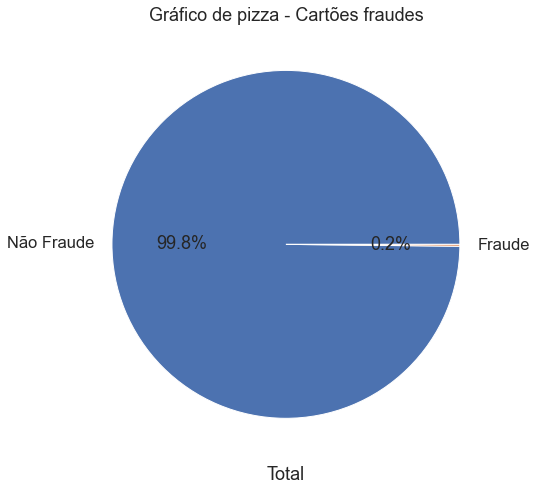

In [28]:
plt.figure(figsize=(15, 8))

plt.pie(df.groupby('Class')['Class'].count(), labels=['Não Fraude', "Fraude"], autopct='%1.1f%%');
plt.title("Gráfico de pizza - Cartões fraudes")
plt.xlabel("Total")

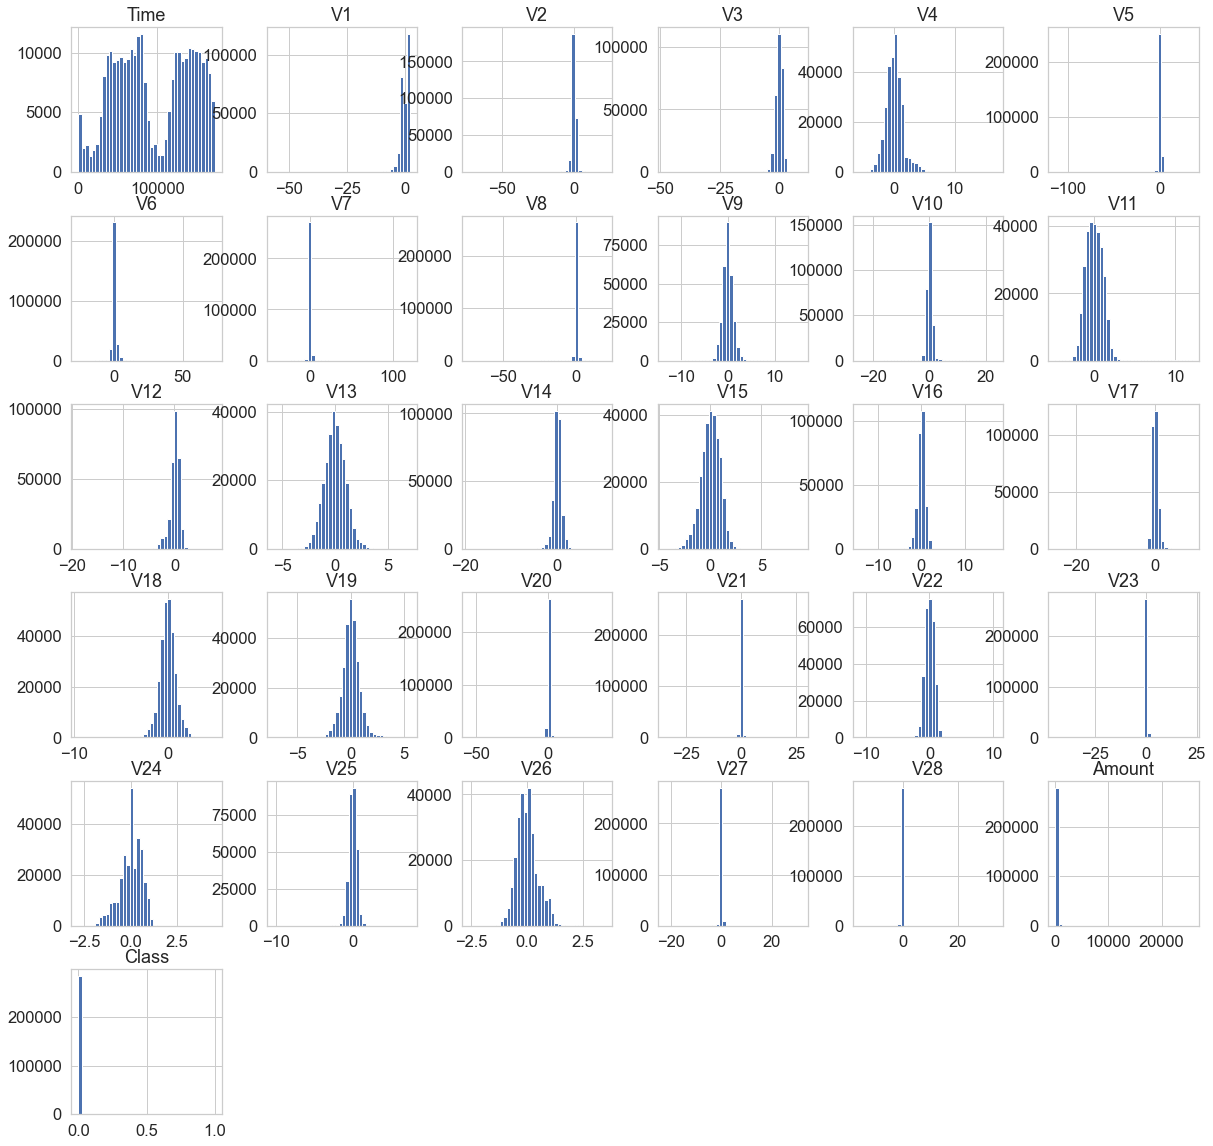

In [29]:
df.hist(bins = 40, figsize=(20.2, 20))
plt.show()

# Pré - processamento de dados

- O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

**Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações**

In [30]:
# Defenindo base de treino e teste train e test

x = df.drop(["Class"], axis = 1)
y = df["Class"]

In [31]:
# Visualizando linha e coluna da váriavel x
x.shape

(284807, 30)

In [32]:
# Visualizando linha e coluna da váriavel y
y.shape

(284807,)

# Escalonamento dados

Standard Scaler: padroniza um recurso subtraindo a média e escalando para a variância da unidade.
A variância da unidade significa dividir todos os valores pelo desvio padrão. StandardScaler resulta em uma distribuição com um desvio padrão igual a 1 variância é igual a 1.

- Variância = desvio padrão ao quadrado.

- E 1 ao quadrado = 1.

- Standard Scaler torna a média da distribuição aproximadamente 0.

In [33]:
from sklearn.preprocessing import StandardScaler

pre_scaler = StandardScaler()
x = pre_scaler.fit_transform(x)
x

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [34]:
# Visualizando linhas e colunas do escalonamento x
x.shape

(284807, 30)

In [35]:
# Visualizando linhas e colunas do escalonamento y
y.shape

(284807,)

# Treino e teste

- Treino e teste do modelo machine learning 80 para dados de treino 20 para dados de teste

train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste.

- Test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.

- Random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados

In [36]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

In [37]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(227845, 30)

In [38]:
# Total de linhas dos dados de treino y

x_train.shape

(227845, 30)

In [39]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(56962, 30)

In [40]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(56962,)

# Modelo machine learning

**Modelo 01 - Decision Tree Classifier**

In [41]:
# Modelo - Decision tree classifier

# Importação da biblioteca
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(max_depth = 5) # Nome do algoritmo M.L
model_decision_tree_fit = model_decision_tree.fit(x_train, y_train) # Treinamento do modelo
model_decision_tree_scor = model_decision_tree.score(x_train, y_train) # Score do modelo dados treino x

print("Modelo - Decision Tree Classifier: %.2f" % (model_decision_tree_scor * 100)) # Score do modelo dados treino y

Modelo - Decision Tree Classifier: 99.96


In [42]:
# Previsão do modelo
model_decision_tree_pred = model_decision_tree.predict(x_test)
model_decision_tree_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Plot

- Plot da árvore

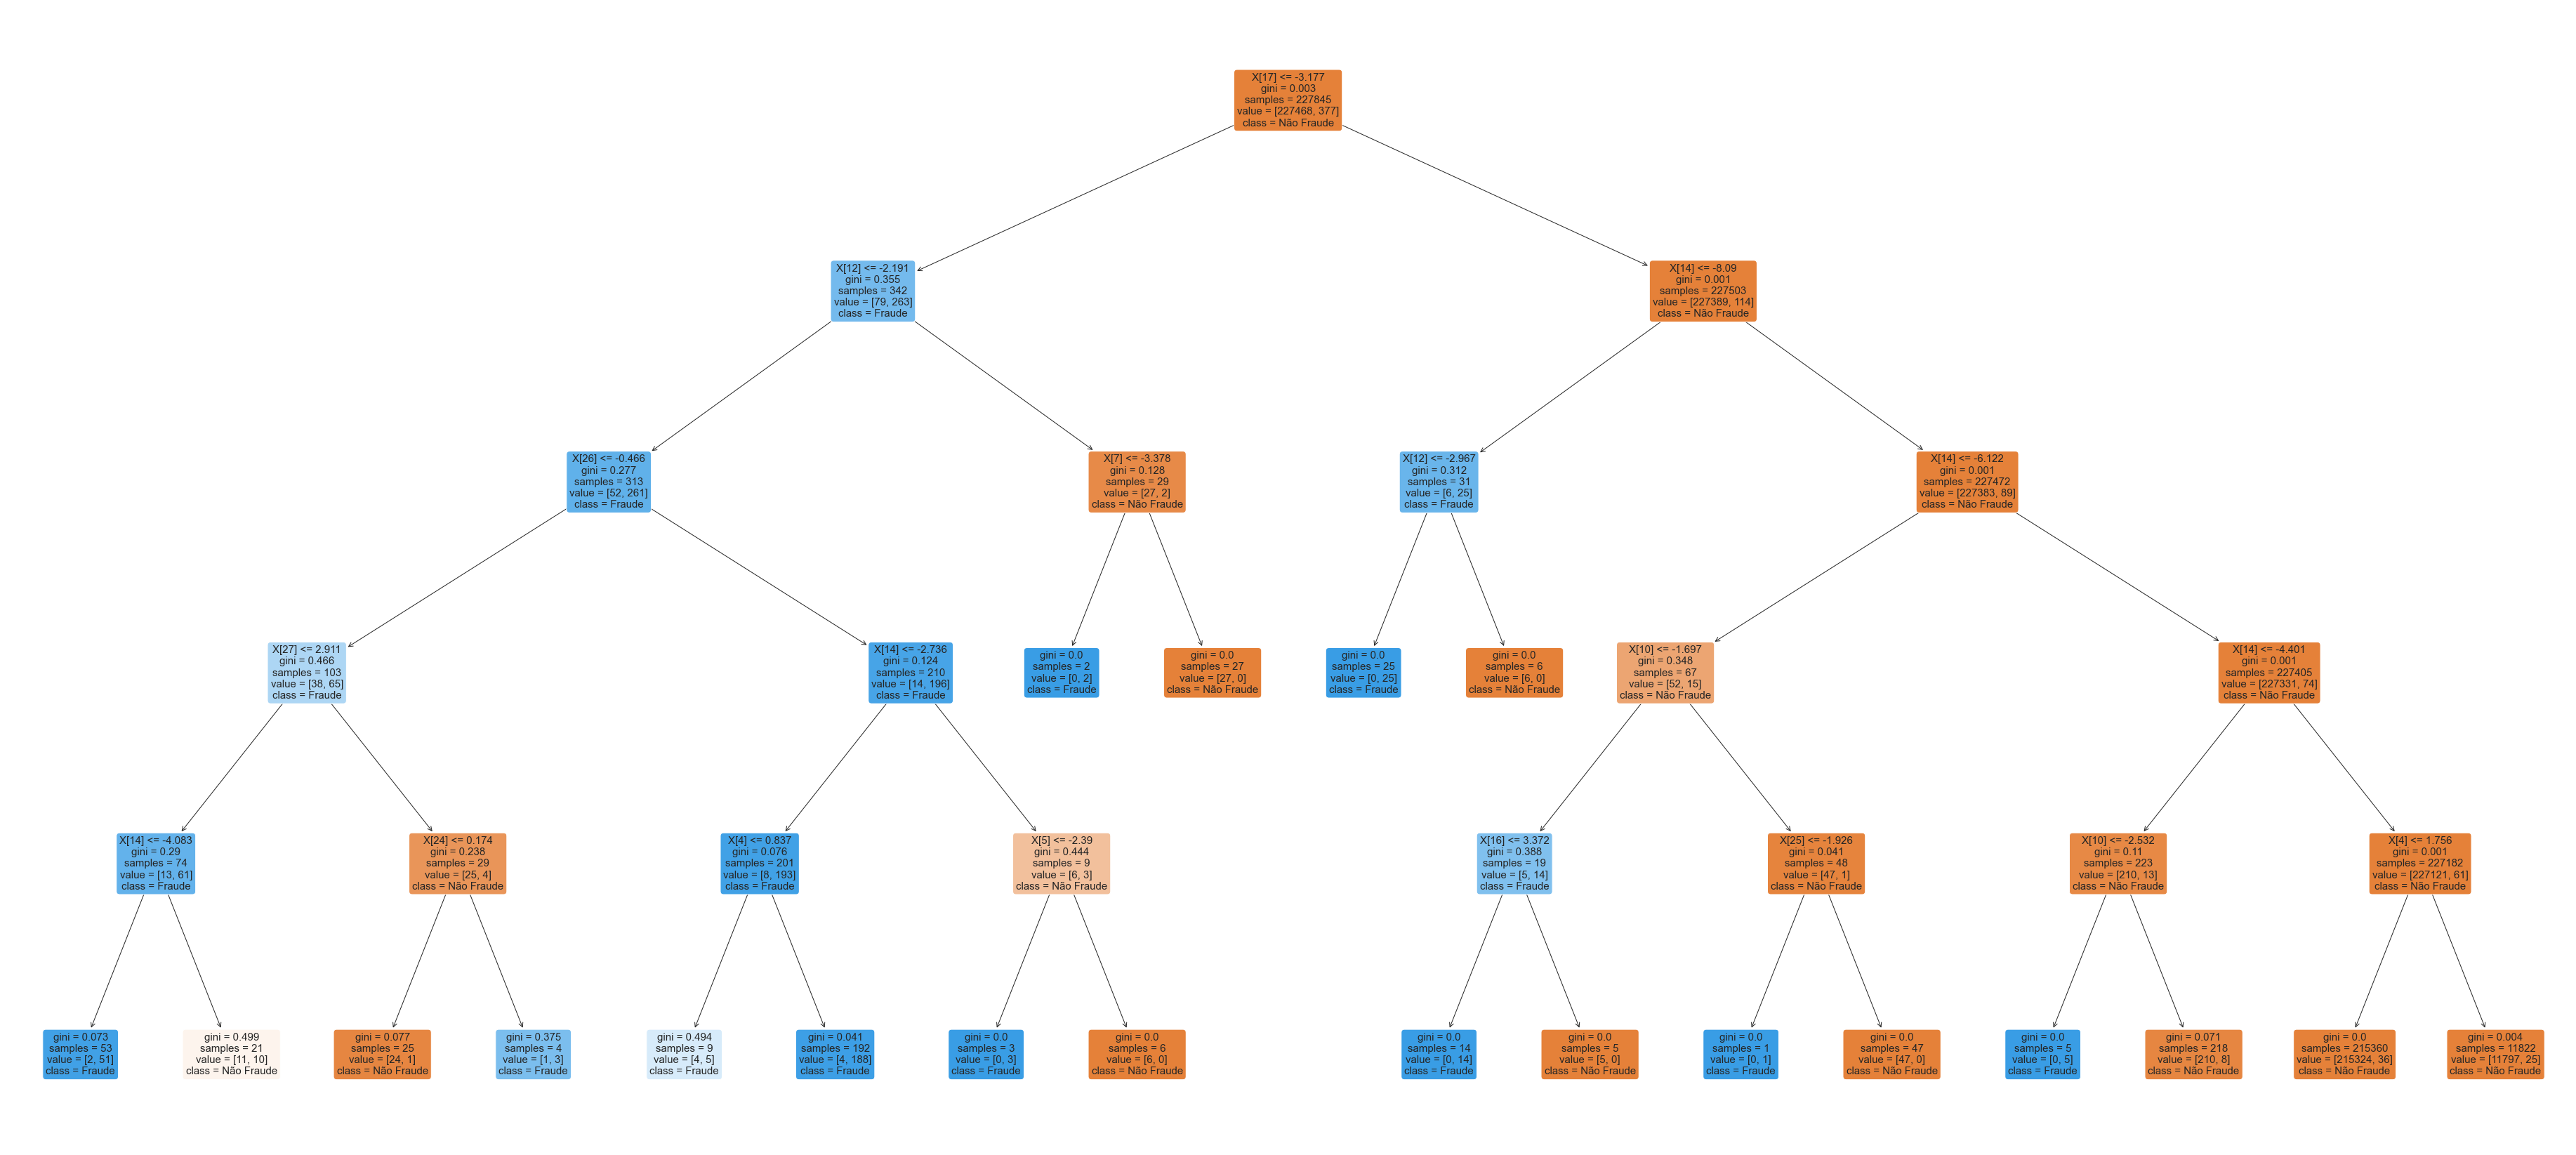

In [43]:
# Gráfico da árvore
from sklearn import tree

fig, ax = plt.subplots(figsize=(65.5, 30), facecolor = "w")
tree.plot_tree(model_decision_tree, 
               ax = ax, 
               fontsize = 15, 
               rounded = True, 
               filled = True, 
               class_names = ["Não Fraude", "Fraude"])
plt.show()

# Accuracy

- Ela indica performance geral do modelo dentros todos as classificações quantas modelo classificou corretamente.

In [44]:
# Accuracy do modelo 
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, model_decision_tree_pred)
print("Acurácia - Decision Tree Classifier: %.2f" % (accuracy_dt * 100))

Acurácia - Decision Tree Classifier: 99.94


# Matrix confusion ou Matriz de Confusão

A matriz de confusão uma tabela que indica erros e acertos do modelo comparando com um resultado.

- Verdadeiros Positivos: A classificação da classe positivo.
- Falsos Negativos (Erro Tipo II): Erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
- Falsos Positivos (Erro Tipo I): Erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo
- Verdadeiros Negativos: Classificação correta da classe Negativo.

In [45]:
# Matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_decision_tree_pred)
matrix_confusion

array([[56838,     9],
       [   27,    88]], dtype=int64)

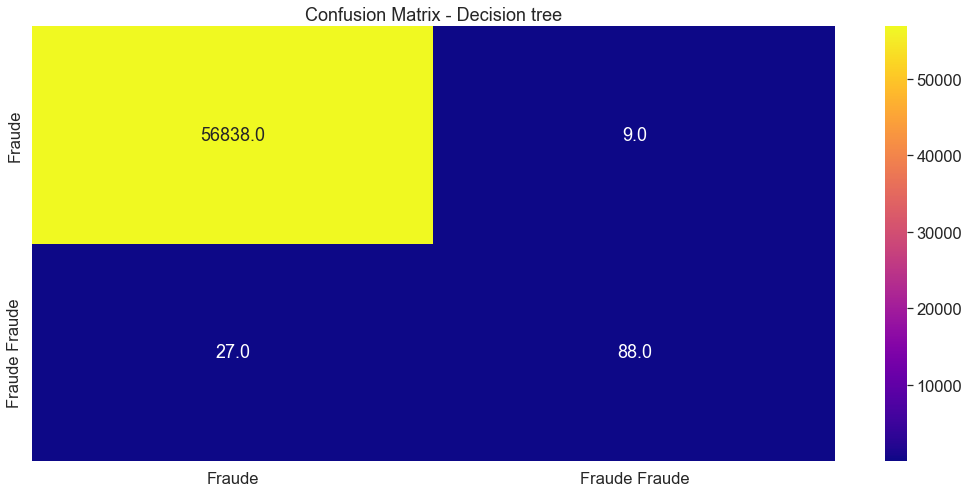

In [46]:
plt.figure(figsize=(18, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Fraude", "Fraude Fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Fraude Fraude"]);

# Curva roc

- A curva roc ela exibir graficamente comparar a avaliar acurácia. As curvas roc integram três medidas precisão relacionadas a sensibilidade com os verdadeiro e positivo, especificidade com os verdadeiro negativo.

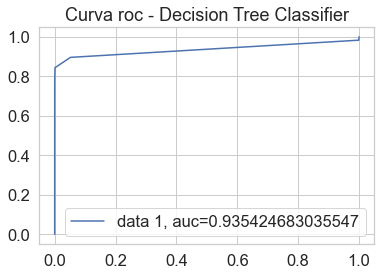

In [47]:
# Cruva roc do modelo

from sklearn import metrics

roc_g = model_decision_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification report

- O visualizador do relatório de classificação exibe as pontuações de precisão, recuperação, F1 e suporte para o modelo. Para facilitar a interpretação e a detecção de problemas, o relatório integra pontuações numéricas com um mapa de calor codificado por cores. Todos os mapas de calor estão na faixa para facilitar a comparação fácil de modelos de classificação em diferentes relatórios de classificação.

In [48]:
# Classification report

from sklearn.metrics import classification_report

classification = classification_report(y_test, model_decision_tree_pred)
print("Modelo - Decision Tree Classifier")
print("\n")
print(classification)

Modelo - Decision Tree Classifier


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.91      0.77      0.83       115

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
# Métricas do modelos

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_decision_tree_pred)
Recall = recall_score(y_test, model_decision_tree_pred)
Accuracy = accuracy_score(y_test, model_decision_tree_pred)
F1_Score = f1_score(y_test, model_decision_tree_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.999368
0,precision,0.907216
3,F1_Score,0.830189
1,Recall,0.765217


**Modelo 02 - Naive bayes**

In [50]:
# Naive bayes GaussianNB

# Importação da biblioteca
from sklearn.naive_bayes import GaussianNB

# Nome do modelo
model_naive_bayes = GaussianNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)

# # Score do modelo 
model_naive_bayes_scor = model_naive_bayes.score(x_train, y_train)
print("Model - Naive bayes GaussianNB: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive bayes GaussianNB: 97.78


In [51]:
# Previsão do modelo
model_naive_bayes_pred = model_naive_bayes.predict(x_train)
model_naive_bayes_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

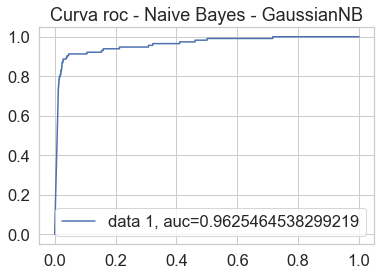

In [52]:
# Curva roc do modelo

roc_g = model_naive_bayes.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Naive Bayes - GaussianNB")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
# Accuracy do modelo

acuracia_NBG = metrics.accuracy_score(y_train, model_naive_bayes_pred)
print("Acuracia - Naive Bayes - GaussianNB: %.2f" % (acuracia_NBG * 100))

Acuracia - Naive Bayes - GaussianNB: 97.78


In [54]:
# Confusion matrix

matrix_confusion_2 = confusion_matrix(y_train, model_naive_bayes_pred)
matrix_confusion_2

array([[222482,   4986],
       [    65,    312]], dtype=int64)

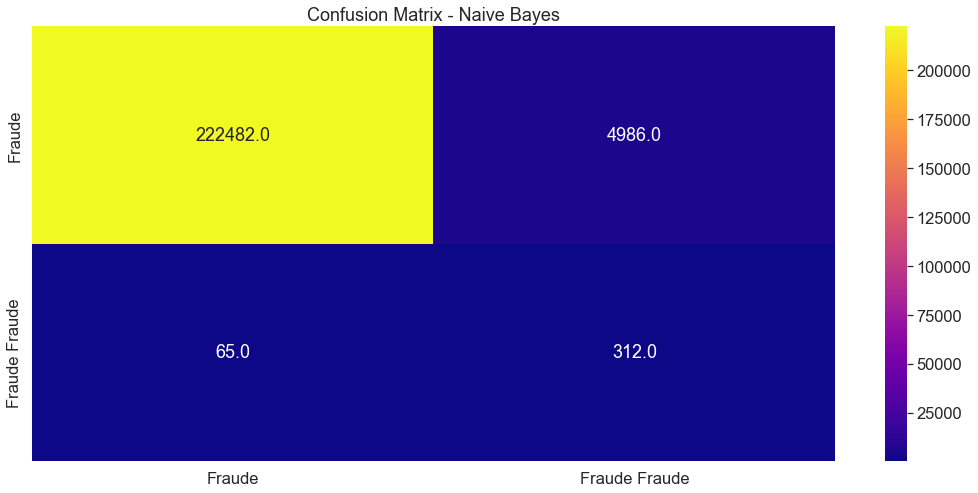

In [55]:
plt.figure(figsize=(18, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Naive Bayes'); 
ax.xaxis.set_ticklabels(["Fraude", "Fraude Fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Fraude Fraude"]);

In [56]:
#  Classification report

class_report = classification_report(y_train, model_naive_bayes_pred)
print("Modelo - Naive Bayes - GaussianNB")
print("\n")
print(class_report)

Modelo - Naive Bayes - GaussianNB


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227468
           1       0.06      0.83      0.11       377

    accuracy                           0.98    227845
   macro avg       0.53      0.90      0.55    227845
weighted avg       1.00      0.98      0.99    227845



In [57]:
# Métricas do modelo

print("Modelo - Naive Bayes - GaussianNB")
print("\n")
print("Precision - Naive Bayes - GaussianNB = {}".format(precision_score(y_train, model_naive_bayes_pred, average='macro')))
print("Recall - Naive Bayes - GaussianNB = {}".format(recall_score(y_train, model_naive_bayes_pred, average='macro')))
print("Accuracy - Naive Bayes - GaussianNB = {}".format(accuracy_score(y_train, model_naive_bayes_pred)))
print("F1 Score - Naive Bayes - GaussianNB = {}".format(f1_score(y_train, model_naive_bayes_pred, average='macro')))

Modelo - Naive Bayes - GaussianNB


Precision - Naive Bayes - GaussianNB = 0.5292990370451275
Recall - Naive Bayes - GaussianNB = 0.9028333200941338
Accuracy - Naive Bayes - GaussianNB = 0.9778314204832232
F1 Score - Naive Bayes - GaussianNB = 0.5493659384138982


# Resultados

In [58]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Decision tree",
               "Naive Bayes"],

    "Acurácia" :[accuracy_dt,
                 acuracia_NBG]})

modelos_1 = modelos.sort_values(by = "Acurácia", ascending = True)
modelos_1.to_csv("modelos_1.csv")
modelos_1

,Models,Acurácia
1,Naive Bayes,0.977831
0,Decision tree,0.999368


In [59]:
# Salvando modelo Machine learning

import pickle    
    
with open('model_decision_tree_pred.pkl', 'wb') as file:
    pickle.dump(model_decision_tree_pred, file)

FileNotFoundError: [Errno 2] No such file or directory: 'model_decision_tree_pred.pkl'

# Modelos de hiperparametros - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import cross_validate

results = cross_validate(model_decision_tree, 
                         x_train, 
                         y_train, 
                         cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

print(f"Mean train score {np.mean(results['train_score']):.2f}")
print(f"Mean test score {np.mean(results['test_score']):.2f}")

In [ ]:
# Modelo Decision Tree Classifier

modelo_arvore_cla = DecisionTreeClassifier()
modelo_arvore_cla_fit = modelo_arvore_cla.fit(x_train, y_train)
modelo_arvore_cla

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

SEED = 123456

# Parametros do modelo
parametros = {
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

#parametros = RandomizedSearchCV_fit.best_index_
parametros

# Modelo 01 - Decision Tree Classifier
modelo_arvore_cla = DecisionTreeClassifier()
DTC = RandomizedSearchCV(modelo_arvore_cla, 
                         parametros, 
                         random_state = SEED, 
                         cv = 5, 
                         return_train_score = True, 
                         n_iter = 10, 
                         scoring ='accuracy')

# Randomized SearchCV treinamento
RandomizedSearchCV_fit = DTC.fit(x_train, y_train)
pred_randomized_search_cv = DTC.predict(x_train)

# Resultados 
results_RandomizedSearchCV = RandomizedSearchCV_fit.cv_results_
print(results_RandomizedSearchCV)
print()
#resut = results_RandomizedSearchCV['params'][parametros]
#print(resut)

# Modelo Decision Tree Classifier
modelo_arvore_cla = DecisionTreeClassifier()
modelo_arvore_cla_fit = modelo_arvore_cla.fit(x_train, y_train)
modelo_arvore_cla_pred = modelo_arvore_cla.predict(x_test)

print("Parametros - RandomizedSearchCV:", parametros)

In [ ]:
# Previsão modelo
modelo_arvore_cla_pred = modelo_arvore_cla.predict(x_test)
modelo_arvore_cla_pred

In [ ]:
# Accuracy do modelo
acuracia_1 = metrics.accuracy_score(y_train, pred_randomized_search_cv)

print("Acuracia - Randomized search cv: %.2f" % (acuracia_1 * 100))

In [ ]:
# Confusion matrix
matrix_confusion_1 = confusion_matrix(y_test, modelo_arvore_cla_pred)
matrix_confusion_1

#plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['raude', 'Não fraude']) 

In [ ]:
plt.figure(figsize=(18, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Randomized search cv'); 
ax.xaxis.set_ticklabels(["Fraude", "Fraude Fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Fraude Fraude"]);

In [ ]:
classification = classification_report(y_test, modelo_arvore_cla_pred)

print("Modelo -  RandomizedSearchCV")
print()
print(classification)

In [ ]:
roc_g = modelo_arvore_cla.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Métricas do modelos

precision = precision_score(y_test, modelo_arvore_cla_pred)
Recall = recall_score(y_test, modelo_arvore_cla_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_cla_pred)
F1_Score = f1_score(y_test, modelo_arvore_cla_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

# Modelo de hiperparametros - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametros modelo e cálculo do gini e entropy
parametros = {
  "max_depth" : [3, 5],
  "min_samples_split" : [32, 64, 128],
  "min_samples_leaf" : [32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

# Modelo Decision Tree Classifier
modelo_arvore_cla = DecisionTreeClassifier()
DTCG = GridSearchCV(model_decision_tree, parametros, cv = 5, return_train_score = True, scoring = "accuracy")
grid_fit = DTCG.fit(x, y)

# Resultados do modelo
results_GridSearchCV = grid_fit.cv_results_
parametros = grid_fit.best_index_
results_GridSearchCV["params"][parametros]

print(results_GridSearchCV)
print()
print(f"Mean train score {results_GridSearchCV['mean_train_score'][parametros]:.2f}")
print()
print(f"mean test score {results_GridSearchCV['mean_test_score'][parametros]:.2f}")

In [ ]:
# Previsão 

grid_pred = DTCG.predict(x_test)
grid_pred

In [ ]:
# Classification report modelo

classification = classification_report(y_test, grid_pred)
print("Modelo -  GridSearchCV")
print()
print(classification)

In [ ]:
# Confusion matrix

matrix_confusion_2 = confusion_matrix(y_test, grid_pred)
matrix_confusion_2

In [ ]:
plt.figure(figsize=(18, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - GridSearchCV'); 
ax.xaxis.set_ticklabels(["Fraude", "Fraude Fraude"]); ax.yaxis.set_ticklabels(["Fraude", "Fraude Fraude"]);

In [ ]:
# Accuracy score

acuracia_2 = accuracy_score(y_test, grid_pred)
print("Acuracia - GridSearchCV: %.2f" % (acuracia_2 * 100))

In [ ]:
# Curva roc do modelo

roc_g = DTCG.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Grid Search CV")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Métricas do modelo

precision = precision_score(y_test, grid_pred)
Recall = recall_score(y_test, grid_pred)
Accuracy = accuracy_score(y_test, grid_pred)
F1_Score = f1_score(y_test, grid_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

In [ ]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Modelo - GridSearchCV", 
               "Modelo - Randomized SearchCV"],

    "Acurácia" :[acuracia_1, 
                 acuracia_2]})

modelos_2 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_2.to_csv("modelos_3.csv")
modelos_2